https://reservoirpy.readthedocs.io/en/latest/user_guide/quickstart.html

In [19]:
import reservoirpy as rpy

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible!

### 1. リザーバーの定義

確認：リザーバーの構造

In [20]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9) 

### 2. 入力データの定義

X.shape: (100, 1)


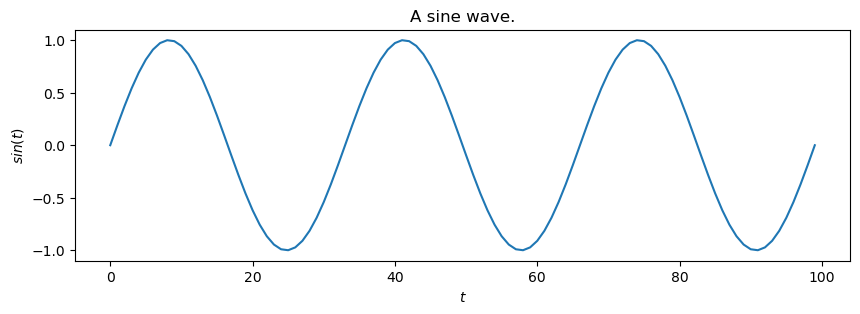

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
print(f"X.shape: {X.shape}")

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

### 3. データの入力①: for loop
リザーバー状態 = reservoir(入力)

In [29]:
s = reservoir(X[0].reshape(1, -1))

print("New state vector shape: ", s.shape)

# s = reservoir.state() で状態ベクトルを取得できる

New state vector shape:  (1, 100)


全データの入力

In [24]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

リザーバーの推移 確認

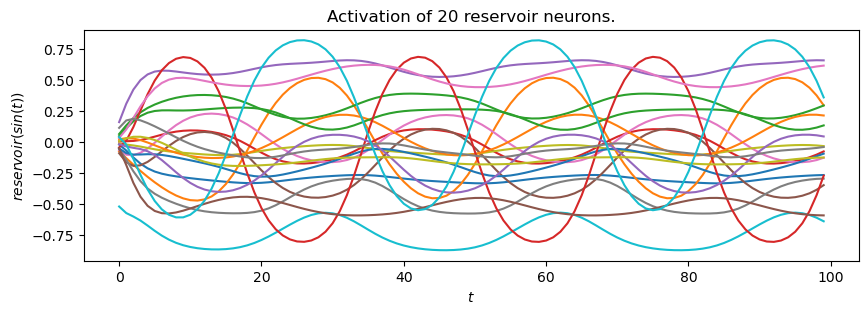

In [25]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()

### 4. データの入力①: Run method

In [26]:
states = reservoir.run(X)

### 5. リザーバーの状態: リセット、初期化、途中変更

In [32]:
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN

reservoir = reservoir.reset()  # 内部状態をゼロにリセット


In [33]:
states_from_null = reservoir.run(X, reset=True)  # 内部状態をリセットしてから実行

In [34]:
a_state_vector = np.random.uniform(-1, 1, size=(1, reservoir.output_dim))
states_from_a_starting_state = reservoir.run(X, from_state=a_state_vector)  # ランダムな状態から開始

In [35]:
previous_states = reservoir.run(X)  # 以前の状態で実行

with reservoir.with_state(reset=True):
    states_from_null = reservoir.run(X)  # 一時的にリセットされた状態で実行

# コンテキスト終了後、元の状態に戻る
states_from_previous = reservoir.run(X)  # 過去の状態を保持している

### 6. リードアウト層の作成

In [36]:
from reservoirpy.nodes import Ridge

readout = Ridge(ridge=1e-7)

### 7. 学習データの定義

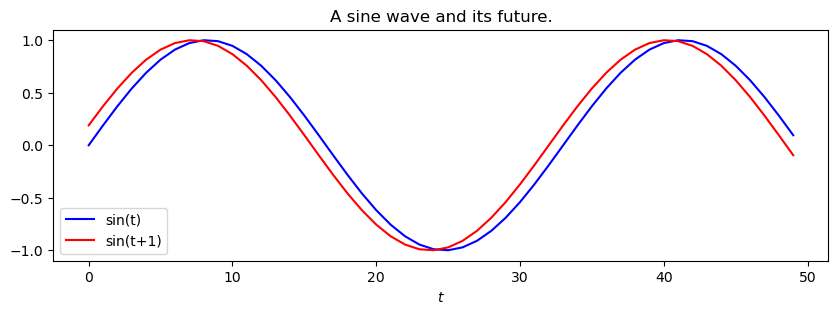

In [37]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

### 8. 学習

In [39]:
train_states = reservoir.run(X_train, reset=True)

In [40]:
readout = readout.fit(train_states, Y_train, warmup=10)

### 9. 学習結果確認

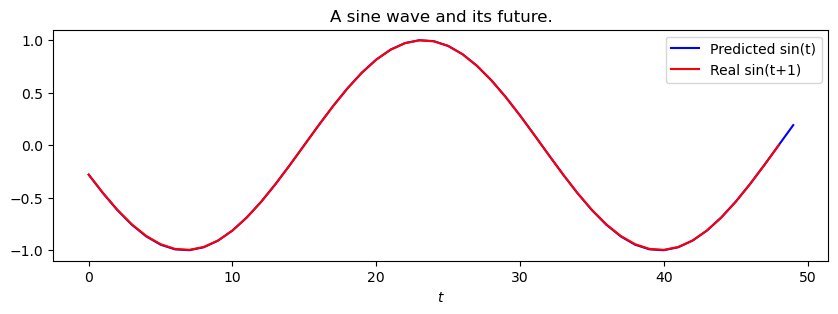

In [41]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()